In [43]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pickle
from scipy.io import loadmat
hiwa = pickle.load(open("Results/08302023/hiwa_transfer_moth_1", "rb"))
FD = loadmat("Results/08302023/No_HiWA_SCENARIO_II_F_OneMissingSubj_sigma0.0025_PCAThreshold10_noHidUnit15_lr0.005_tol0.1_TrainTestRatio0.5")
CD = loadmat("Results/08302023/No_HiWA_SCENARIO_II_CD_OneMissingSubj_sigma0.0025_PCAThreshold10_noHidUnit15_lr0.005_tol0.1_TrainTestRatio0.5")

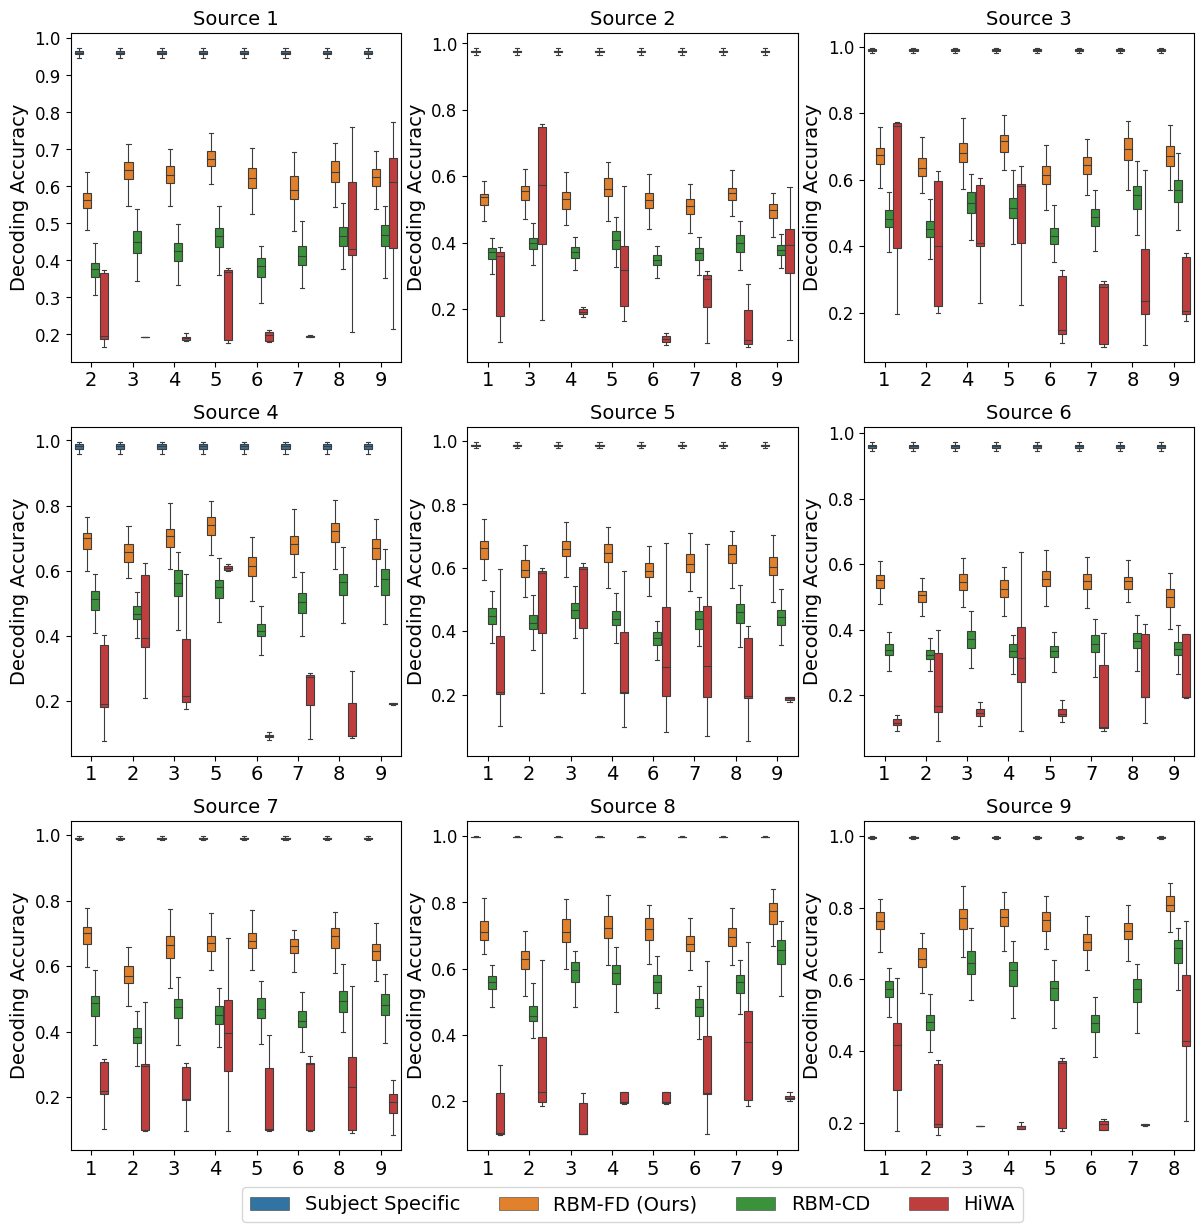

In [7]:
index=1
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
Z=[1,2,3,4,6,7,8,9,10]
C=[1,2,3,4,5,6,7,8,9]
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize=(14.5,14.5))

for i, index in enumerate(Z):
    
    all_result = []
    all_label = []
    moth_label = []
    for j, other_index in enumerate(Z):
        LDA = []
        Fisher = []
        MLCD = []
        if other_index != index:
            hiwa = pickle.load(open("Results/hiwa_transfer_moth_{}".format(other_index), "rb"))
            LDA    = list(FD['Rate_LDA']['moth_{}'.format(index)][0][0][-1])
            Fisher = list(FD['Rate_FRBM']['moth_S_is_{}_D_is_{}'.format(index,other_index)][0][0][-1])
            MLCD   = list(CD['Rate_MLRBM']['moth_S_is_{}_D_is_{}'.format(index,other_index)][0][0][-1])
            hiwa_result = []
            for s, seed_result in enumerate(hiwa):
                if seed_result[0][i-1] < 0.95 and seed_result[0][i-1] > 0.05:
                    hiwa_result.append(seed_result[0][i-1])
            #print(FRBM_mean, MLRBM_mean, HIWA_mean)
            
            all_result += LDA + Fisher + MLCD + hiwa_result
            all_label += ["Subject Specific"]*100 + ["RBM-FD (Ours)"]*100 +\
                ["RBM-CD"]*100 + ["HiWA"]*len(hiwa_result)
            moth = ["{}".format(C[j])]
            moth_label += moth*(100*3+len(hiwa_result)) 
    df = pd.DataFrame({"Decoding Accuracy":all_result, "Method": all_label, "": moth_label})
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot(data=df, x="", y="Decoding Accuracy", hue="Method",  
             linewidth=0.8,width=0.8,
              showfliers = False, ax=ax)
    ax.set_title("Target {}".format(C[i]))
    ax.legend().set_visible(False)
    if i == 7:
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=4)
    else:
        pass

plt.savefig("Scenario2.pdf", bbox_inches="tight")